# Esercitazione 8

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In questa esercitazione vogliamo provare a risolvere numericamente il problema di trovare lo stato fondamentale di un sistema quantistico, per un'hamiltoniana che non ammette una soluzione analitica.

Consideriamo una particella in una dimensione soggetta al potenziale
$$ V(x) = x^4 - \frac{5}{2}x^2. $$

Cercheremo lo stato fondamentale usando una funzione di test:

$$ \Psi_T^{\mu,\sigma}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2} }, $$
che dipende dai parametri $\sigma$ e $\mu$.

Il valore di aspettazione dell'hamiltoniana su tale stato di test è - secondo il principio variazionale - sempre maggiore del valore di aspettazione sullo stato fondamentale. L'obiettivo è allora trovare $\sigma$ e $\mu$ tali che $\Psi_T^{\mu, \sigma}(x)$ minimizzi $<\hat H>_T$, ossia

$$ <\hat H>_T = \frac{ \int dx{\Psi_T^{\mu,\sigma}}^*(x)\hat H \Psi_T^{\mu,\sigma}(x)}{ \int dx |\Psi_T^{\mu, \sigma}(x)|^2 } = \int dx \frac{ |\Psi_T^{\mu,\sigma}(x)|^2 }{ \int dx|\Psi_T^{\mu,\sigma}(x)|^2 }\frac{ \hat H\Psi_T^{\mu,\sigma}(x) }{ \Psi_T^{\mu,\sigma}(x) } \equiv \int dx p(x)E_{\text{loc}(x)}.  $$

La funzione $p(x)$ dell'ultimo passaggio è a tutti gli effetti una densità di probabilità che può essere campionata usando l'algoritmo di Metropolis (così non è necessario calcolare anche l'integrale di normalizzazione). La funzione $E_{\text{loc}}(x)$ è invece nota e campionabile direttamente. L'integrale sopra si può allora risolvere con tecniche Monte Carlo.

Ogni volta che è necessario calcolare il valor medio di $\hat H$, l'integrale è ottenuto campionando $50000$ punti. La mossa proposta di volta in volta nel metropolis è uno spostamento dalla posizione attuale con un incremento $\Delta x\in(-\delta, \delta)$, con $\delta$ posto a $2$ in modo da ottenere una frequenza di accettazione della mossa intorno al $50\%$.

## Simulated Annealing

Il problema di ottimizzazione viene affrontato con la tecnica del _simulated annealing_. In sostanza, la funzione costo da ottimizzare, in questo caso $<\hat H>_T$, viene interpretata come un'energia (e lo è in questo caso!). Imitando la natura, che "è capace" di trovare la configurazione di minima energia per un liquido che si raffredda lentamente, vogliamo lasciare che anche il sistema da simulare minimizzi la funzione costo mentre viene "raffreddato". In termini più pratici, costruiamo una distribuzione di Bolzmann che abbia per energia la funzione da ottimizzare: $p(x) = \exp\{[-\beta L(x)]/Z\}$, dove $L(x)$ è la funzione costo. Ora, noi siamo in grado di campionare tale distribuzione (usando metropolis, come in esercitazione 6 o 7) e sappiamo anche che all'aumentare di $\beta$, ossia al diminuire della "temperatura", la distribuzione di Bolzmann si concentra nei minimi di $L(x)$.

Nel nostro caso la distribuzione di Bolzmann è funzione di $\mu$ e $\sigma$. Campionare punti distribuiti secondo $p(x)$ significa trovare delle coppie di $\mu$ e $\sigma$ per cui lo stato associato è virtualmente distribuito secondo $p(x)$. Allora, man mano che viene aumentato $\beta$, il programma campionerà delle coppie $(\mu, \sigma)$, fino a quando l'energia media raggiunge un valore con precisione fissata.

Poiché, come si è detto, all'aumentare di $\beta$ la distribuzione di Bolzmann si concentra nei minimi, è necessario ridurre anche il passo con cui vengono campionati $\mu$ e $\sigma$, così da ottenere un campionamento più fitto.

Per questo esercizio, ogni stima del valor medio di $\hat H$ è eseguita con $70000$ punti. Il _simulated annealing_ viene eseguito a blocchi di $10$ passi (quindi $10$ campionamenti della distribuzione di Bolzmann per fissata temperatura), fino a quando l'errore sul valor medio di $<\hat H>_T$ non è sceso al di sotto di $0.0015$.

Il passo con cui vengono cercati nuovi parametri viene aggiornato ad ogni blocco con la legge $\Delta = 1./\beta$ e $\beta$ stesso è aggiornato con la legge $\beta_{i+1} = \beta_{i} + 2.5$.

Stima del valor medio =  -0.443615 +- 0.00124373
mu = 0.82, sigma = 0.62


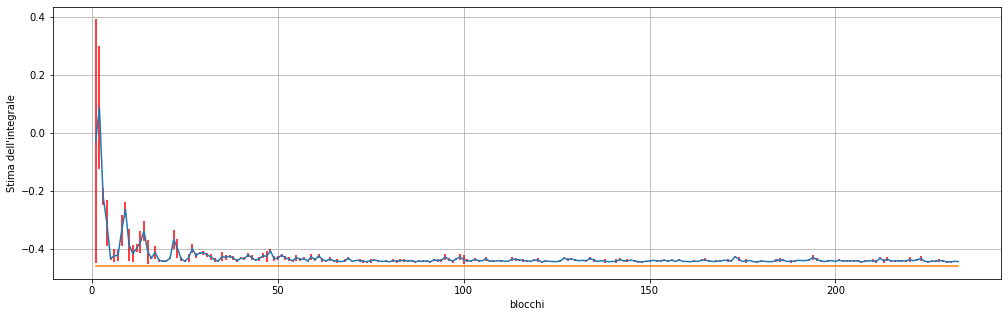

In [150]:
iblk, I, error, Iblk, blk_err = np.loadtxt("annealing.dat", usecols=(0,1,2,3,4), delimiter=',', unpack='true')

actual = -0.46046587969271513
plt.figure(figsize = (17,5))
plt.errorbar(iblk,Iblk,yerr=blk_err, ecolor='red')
plt.plot(iblk, actual*np.ones(len(iblk)))
plt.xlabel("blocchi")
plt.ylabel("Stima dell'integrale")
plt.grid()
print("Stima del valor medio =  " + str(Iblk[-1]) + " +- " + str(blk_err[-1]) )
print("mu = 0.82, sigma = 0.62" )

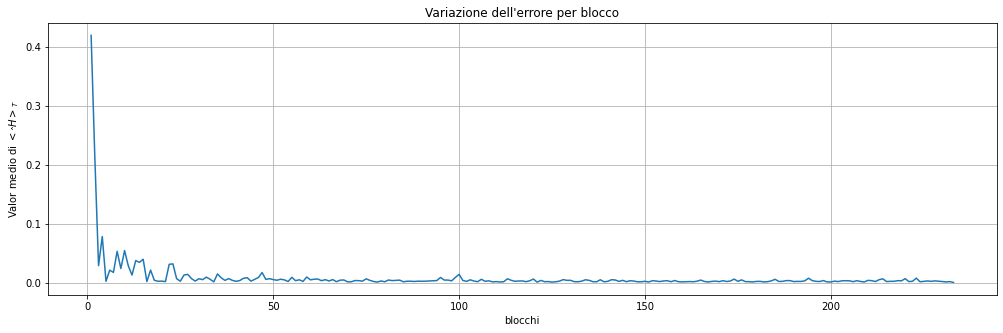

In [140]:
plt.figure(figsize = (17,5))
plt.plot(iblk,blk_err)
plt.xlabel("blocchi")
plt.ylabel("Valor medio di $<\hat H>_T$")
plt.title("Variazione dell'errore per blocco")
plt.grid()

Nel programma è stato implementato anche il calcolo della media progressiva a blocchi per il simulated annealing. Una volta che la ricerca del minimo è terminata, viene eseguita nuovamente una ricerca a partire dall'ultima configurazione. In questo modo è possibile fornire una stima più precisa dell'energia minima e dei punti di minimo $\mu_{min}$, $\sigma_{min}$. Questa volta il passo è aggiornato con la legge $\Delta = 1./(2\beta)$

Stima del valor medio = -0.445527 +- 0.000114046
mu = -0.803959, sigma = 0.627482


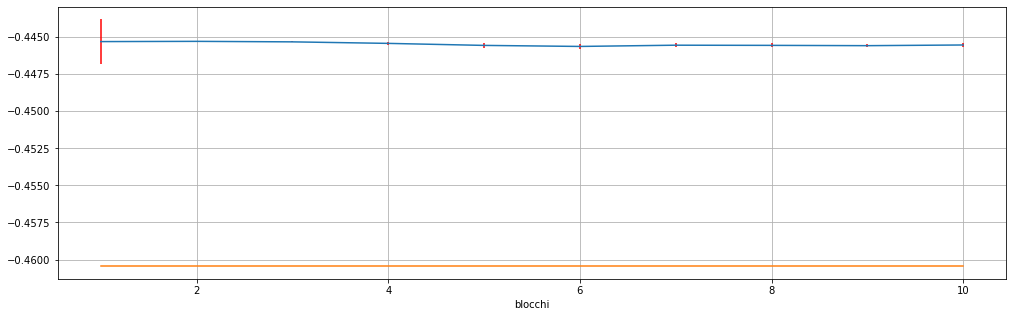

In [152]:
iblk, I, error, Iblk, blk_err, mu, sigma = np.loadtxt("annealing_final.dat", usecols=(0,1,2,3,4,5,6), delimiter=',', unpack='true')

actual = -0.46046587969271513
plt.figure(figsize = (17,5))
plt.errorbar(iblk,I,yerr=error, ecolor='red')
plt.plot(iblk, actual*np.ones(len(iblk)))
plt.xlabel("blocchi")
# plt.ylabel("Stima dell'integrale")
plt.grid()
print("Stima del valor medio = " + str(I[-1]) + " +- " + str(error[-1]) )
print("mu = " + str(mu[-1]) + ", sigma = " +  str(sigma[-1]) )

Il valore di energia misima trovato non è compatibile con quello atteso dalla soluzione numerica dell'equazione di Schroedinger, ma non stupisce, poiché le tecniche Monte Carlo non hanno l'obiettivo di individuare la soluzione esatta al problema, ma una risposta vicina alla soluzione.

Fissati i valori dei parametri $\mu$ e $\sigma$, eseguiamo una stima di $<\hat H>_T$ usando la divisione in blocchi e ne stimiamo l'incertezza.

Stima dell'integrale = -0.442244 +- 0.00125793


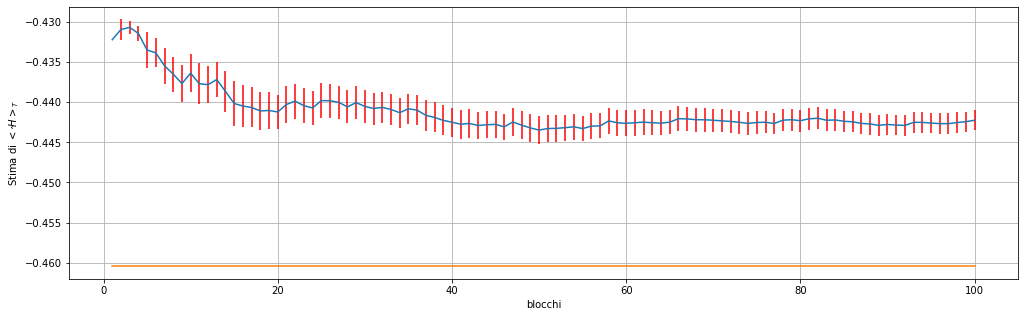

In [153]:
iblk, I, error = np.loadtxt("averageH.dat", usecols=(0,1,2), delimiter=',', unpack='true')

actual = -0.46046587969271513
plt.figure(figsize = (17,5))
plt.errorbar(iblk,I,yerr=error, ecolor='red')
plt.plot(iblk, actual*np.ones(len(iblk)))
plt.xlabel("blocchi")
plt.ylabel("Stima di $<\hat H>_T$")
plt.grid()

print("Stima dell'integrale = " + str(I[-1]) + " +- " + str(error[-1]) )

Infine mostriamo un istogramma riempito con i campionamenti di $|\Psi_T^{\mu, \sigma}(x)|$, sempre usando i valori dei parametri che minimizzano l'energia. Confrontiamo il risultato con l'autofunzione dello stato fondamentale calcolata risolvendo l'equazione di Schroedinger.

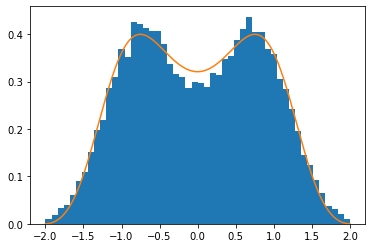

In [190]:
data = np.loadtxt("histo.dat", usecols=(0), delimiter=None, unpack='true')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 4
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = np.abs(psi/np.sqrt(dx))**2

plt.hist(data, 50, density = True, range = (-a/2,a/2) )
plt.plot(x, psi[0])

plt.show()